In [1]:
# Supplemental program for 1A1_lowest_peak_dispersion.ipynb
# to compare the Aw and w position for the lowest peak in 1A1 channel
# for 3-, 7-orbital models

%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *

########################################################################################
# first plot lowest peak and d9L continuum bottom separately to see if any discontinuity
########################################################################################
ed = 0
tpds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
tpds = [0.4]
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

Npts = 9

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0
eta = 0.001

Norb7 = 7
Mc7 = 32

titlename = 'tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Udd'+str(Udd)+'_Upp'+str(Upp)+'_eta'+str(eta)
    
##########################################################################
# E of lowest peak
##########################################################################
Ms = ['bo','rs','g^','m<','cp','k>','yv','--b','--r','--g','--m','--c','--k','--y']
# a[1,0]-tpp*4 is the bottom of p-band
# when (a[:,0]-tpp*4)-a[:,2] less than 0, peak within continuum; larger than 0, discrete state
ii = 0
for tpd in tpds:
    f1A1 = 'Norb7_tpd'+str(tpd)+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
           +'_Mc'+str(Mc7)+'_eta'+str(eta)+'_1A1.txt'
    a = loadtxt('./Norb7/data_lowpeak/'+f1A1,skiprows=0)
    print 'highest peak Delta:'
    print a[:,0]
    
    # continuum bottom via one-hole calculation with exact min(E(k)):
    #b = loadtxt('../onehole_impurity_model/data_E_imp/E_imp_Norb7_tpd'+str(tpd)+'_tpp0.55_Mc32_1A1.txt',skiprows=0)
    #print 'one-hole continuum bottom with exact min(Ek) Delta:'
    #print b[:,0]
    #ab = a[:,0]-4.*tpp+b[:,2]
    # continuum bottom via two-hole calculation with A=50, B=C=0:
    b = loadtxt('./Norb7/data_lowpeak/Aw_Cu_dx2y2_O_Norb7_tpd'+str(tpd) \
                +'_tpp0.55_A50_B0_C0_Upp0_Mc32_eta0.001.txt',skiprows=0)
    print 'two-hole continuum bottom Delta:'
    print b[:,0]
    assert(max(abs(a[:,0]-b[:,0]))<1.e-3)
    
    # debug: 
    #print 'Delta,  wpeak,  d9L,  dw'
    #for i in range(0,len(b)):
    #    print a[i,0], a[i,2], ab[i], ab[i]-a[i,2]
       
    #plot(b[:,0], ab, Ms[ii], Markersize=2, label="one-hole cont_bottom exact E(k), $N=7_{1A1}, t_{pd}=$"+str(tpd))
    plot(b[:,0], b[:,2], Ms[ii+1], Markersize=2, label="two-hole cont_bottom, $N=7_{1A1}, t_{pd}=$"+str(tpd))
    plot(a[:,0], a[:,2], Ms[ii+2], Markersize=2, label="$d^8 \omega_{peak}, N=7_{1A1}, t_{pd}=$"+str(tpd))
    ii += 1

title(titlename, fontsize=8)
xlabel('$t_{pd}$',fontsize=17)
xlabel('$\Delta$',fontsize=17)
#ylabel('$\omega(peak)$',fontsize=17)
#xlim([-4,-3])
#ylim([-13,-9])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("wpeak_d9L_bottom_"+titlename+"_1A1.pdf")

Populating the interactive namespace from numpy and matplotlib
highest peak Delta:
[0.  0.1 0.2 0.3 0.4 0.5]
two-hole continuum bottom Delta:
[6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  6.7  6.6  6.2  6.22 6.24
 6.26 6.28 6.3  6.32 6.34 6.36 6.38 6.4  6.42 6.44 6.46 6.48 6.5  6.52
 6.54 6.56 6.58 6.   6.1  6.2  5.7  5.71 5.72 5.73 5.74 5.75 5.76 5.77
 5.78 5.79 7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  0.71 0.72 0.73 0.74
 0.75 0.76 0.77 0.78 0.79 0.8  1.2  1.4  1.6  1.8  2.   2.5  3.   3.5
 3.6  3.7  3.8  8.5  8.7  8.9  9.1  9.3  0.7  0.6  0.5  0.3  0.2  0.1 ]


ValueError: operands could not be broadcast together with shapes (6,) (84,) 

In [ ]:
##########################################################################
# compare bottom of d9L continuum from different methods 1A1
##########################################################################
ed = 0
tpds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
tpds = [0.4]
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

Npts = 9

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0
eta = 0.001

Norb7 = 7
Mc7 = 32

titlename = 'tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_eta'+str(eta)

Ms = ['bo','rs','g^','m<','cp','k>','yv','--b','--r','--g','--m','--c','--k','--y']

ii = 0
for tpd in tpds:
    print 'tpd = ', tpd
    
    # continuum bottom via one-hole calculation with exact min(E(k)):
    b = loadtxt('../onehole_impurity_model/data_E_imp/E_imp_Norb7_tpd'+str(tpd)+'_tpp0.55_Mc32_1A1.txt',skiprows=0)
    a = b[:,0]-4.*tpp+b[:,2]
    plot(b[:,0], a, Ms[ii], Markersize=2, label="one-hole, $t_{pd}=$"+str(tpd))
    
    # continuum bottom via lowest peak of two-hole calculation with A=50, B=C=0:
    b = loadtxt('./Norb7/data_lowpeak/Aw_Cu_dx2y2_O_Norb7_tpd'+str(tpd) \
                +'_tpp0.55_A50_B0_C0_Upp0_Mc32_eta0.001.txt',skiprows=0)  
    a = b[:,2]
    plot(b[:,0], a, Ms[ii+1], Markersize=2, label="two-hole lowest peak, $t_{pd}=$"+str(tpd))
    
    # continuum bottom via G.S. energy of two-hole calculation with A=50, B=C=0 with only (up,dn) states:
    b = loadtxt('./Norb7/data_GS_as_continuum_bottom/Egs_Norb7_tpd'+str(tpd) \
                +'_tpp0.55_A50_B0_C0_Upp0_Mc32_eta0.001_singlet.txt',skiprows=0) 
    a = b[:,2]
    plot(b[:,0], a, Ms[ii+2], Markersize=2, label="two-hole Egs, $t_{pd}=$"+str(tpd))

title('compare conti.bottom_'+titlename+'_1A1_N=7', fontsize=8)
xlabel('$t_{pd}$',fontsize=17)
xlabel('$\Delta$',fontsize=17)
ylabel('cont_bottom- $\omega_p(d^8)$',fontsize=17)
#xlim([0,1])
#ylim([0,0.5])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("compare conti_bottom_"+titlename+".pdf")

In [ ]:
##########################################################################
# compare bottom of d9L continuum from different methods 3B1
##########################################################################
ed = 0
tpds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
tpds = [0.5]
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

Npts = 9

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0
eta = 0.001

Norb7 = 7
Mc7 = 32

titlename = 'tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_eta'+str(eta)

Ms = ['bo','rs','g^','m<','cp','k>','yv','--b','--r','--g','--m','--c','--k','--y']

ii = 0
for tpd in tpds:
    print 'tpd = ', tpd
    
    # continuum bottom via one-hole calculation with exact min(E(k)):
    b = loadtxt('../onehole_impurity_model/data_E_imp/E_imp_Norb7_tpd'+str(tpd)+'_tpp0.55_Mc32_3B1.txt',skiprows=0)
    a = b[:,0]-4.*tpp+b[:,2]
    plot(b[:,0], a, Ms[ii], Markersize=2, label="one-hole, $t_{pd}=$"+str(tpd))
    
    # continuum bottom via lowest peak of two-hole calculation with A=50, B=C=0:
    b = loadtxt('./Norb7/data_lowpeak/Aw_Cu_dx2y2_O_Norb7_tpd'+str(tpd) \
                +'_tpp0.55_A50_B0_C0_Upp0_Mc32_eta0.001.txt',skiprows=0)  
    a = b[:,2]
    plot(b[:,0], a, Ms[ii+1], Markersize=2, label="two-hole lowest peak, $t_{pd}=$"+str(tpd))
    
    # continuum bottom via G.S. energy of two-hole calculation with A=50, B=C=0 with only (up,dn) states:
    b = loadtxt('./Norb7/data_GS_as_continuum_bottom/Egs_Norb7_tpd'+str(tpd) \
                +'_tpp0.55_A50_B0_C0_Upp0_Mc32_eta0.001_triplet.txt',skiprows=0) 
    a = b[:,2]
    plot(b[:,0], a, Ms[ii+2], Markersize=2, label="two-hole Egs, $t_{pd}=$"+str(tpd))

title('compare conti.bottom_'+titlename+'_3B1_N=7', fontsize=8)
xlabel('$t_{pd}$',fontsize=17)
xlabel('$\Delta$',fontsize=17)
ylabel('cont_bottom- $\omega_p(d^8)$',fontsize=17)
#xlim([0,1])
#ylim([0,0.5])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("compare conti_bottom_"+titlename+".pdf")

pdp =  0.05
8.1 0.03999999999999915
8.4 0.040000000000000036
8.7 0.03999999999999915
9.0 0.04099999999999948
9.3 0.055000000000000604
9.4 0.10200000000000031
9.5 0.18399999999999928


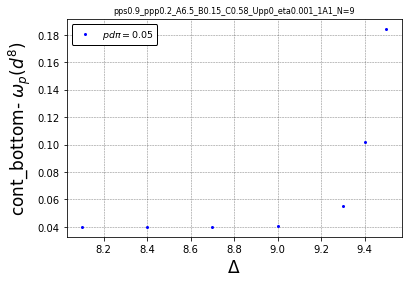

In [15]:
##########################################################################
# bottom of d9L continuum - d8_lowpeak for 1A1
##########################################################################
ed = 0
pdps = [0.05]
pps = 0.9
ppp = 0.2

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0
Mc = 25
eta = 0.001

titlename = 'pps'+str(pps)+'_ppp'+str(ppp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_eta'+str(eta)

Ms = ['bo','rs','g^','m<','cp','k>','yv','--b','--r','--g','--m','--c','--k','--y']
ii = 0
for pdp in pdps:
    print 'pdp = ', pdp
    f1A1 = 'Norb9_pdp'+str(pdp)+'_pps'+str(pps)+'_ppp'+str(ppp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
           +'_Mc'+str(Mc)+'_eta'+str(eta)+'_1A1_one_hole.txt'
    a = loadtxt('./Norb9/data_lowpeak/'+f1A1,skiprows=0)
    
    # continuum bottom via one-hole calculation with exact min(E(k)):
    b = loadtxt('./Norb9/one_hole_continuum_bottom/E_imp_Norb9_pdp'+str(pdp)+'_pps0.9_ppp0.2_Mc25_1A1.txt',skiprows=0)
    ab = (b[:,0]-2.*(pps+ppp)+b[:,2])-a[:,3]
    
    # continuum bottom via lowest peak of two-hole calculation with A=50, B=C=0:
    #b = loadtxt('./data_lowpeak/Aw_Cu_dx2y2_O_Norb7_tpd'+str(tpd) \
    #            +'_tpp0.55_A50_B0_C0_Upp0_Mc32_eta0.001.txt',skiprows=0)
    #assert(max(abs(a[:,0]-b[:,0]))<1.e-3)    
    #ab = b[:,2]-a[:,2]
    
    # continuum bottom via G.S. energy of two-hole calculation with A=50, B=C=0 with only (up,up) states:
    #b = loadtxt('./Norb9/data_GS_as_continuum_bottom/Egs_Norb9_pdp'+str(pdp)+'_pps'+str(pps)+'_ppp'+str(ppp) \
    #            +'_A50_B0_C0_Upp'+str(Upp)+'_Mc'+str(Mc)+'_eta'+str(eta)+'_singlet.txt',skiprows=0)   
    #ab = b[:,3]-a[:,3]

    # debug:
    for i in range(0,len(a)):
        print a[i,0],ab[i]
        
    idx = find(ab>-0.2)
    plot(a[idx,0], ab[idx], Ms[ii], Markersize=2, label="$pd\pi=$"+str(pdp))
    ii += 1
    
    # find critical Delta
    '''
    idx = find(ab>0.001)
    ab_min = min(ab[idx])
    id_min = find(ab==ab_min)
    print 'min positive d9L-wpeak = ', ab_min, 'at Delta = ', a[id_min,0]
    idx = find(ab<0.)
    ab_max = max(ab[idx])
    id_max = find(ab==ab_max)
    print 'max negative d9L-wpeak = ', ab_max, 'at Delta = ', a[id_max,0]
    '''

title(titlename+'_1A1_N=9', fontsize=8)
xlabel('$\Delta$',fontsize=17)
ylabel('cont_bottom- $\omega_p(d^8)$',fontsize=17)
#xlim([4,10])
#ylim([-0.03,0])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("dw_lowpeak_"+titlename+"_1A1.pdf")

In [ ]:
##########################################################################
# bottom of d9L continuum - d8_lowpeak for 3B1
##########################################################################
ed = 0
pdps = [0.25]
pps = 0.9
ppp = 0.2

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0
Mc = 25
eta = 0.001

titlename = 'pps'+str(pps)+'_ppp'+str(ppp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_eta'+str(eta)

Ms = ['bo','rs','g^','m<','cp','k>','yv','--b','--r','--g','--m','--c','--k','--y']
ii = 0
for pdp in pdps:
    print 'pdp = ', pdp
    f3B1 = 'Norb9_pdp'+str(pdp)+'_pps'+str(pps)+'_ppp'+str(ppp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
           +'_Mc'+str(Mc)+'_eta'+str(eta)+'_3B1.txt'
    a = loadtxt('./Norb9/data_lowpeak/'+f3B1,skiprows=0)
    
    # continuum bottom via one-hole calculation with exact min(E(k)):
    #b = loadtxt('../onehole_impurity_model/data_E_imp/E_imp_Norb7_tpd'+str(tpd)+'_tpp0.55_Mc32_3B1.txt',skiprows=0)
    #ab = (b[:,0]-4.*tpp+b[:,2])-a[:,2]
    
    # continuum bottom via lowest peak of two-hole calculation with A=50, B=C=0:
    #b = loadtxt('./data_lowpeak/Aw_Cu_dx2y2_O_Norb7_tpd'+str(tpd) \
    #            +'_tpp0.55_A50_B0_C0_Upp0_Mc32_eta0.001.txt',skiprows=0)
    #assert(max(abs(a[:,0]-b[:,0]))<1.e-3)    
    #ab = b[:,2]-a[:,2]
    
    # continuum bottom via G.S. energy of two-hole calculation with A=50, B=C=0 with only (up,up) states:
    b = loadtxt('./Norb9/data_GS_as_continuum_bottom/Egs_Norb9_pdp'+str(pdp)+'_pps'+str(pps)+'_ppp'+str(ppp) \
                +'_A50_B0_C0_Upp'+str(Upp)+'_Mc'+str(Mc)+'_eta'+str(eta)+'_triplet.txt',skiprows=0)   
    ab = b[:,3]-a[:,3]

    # debug:
    for i in range(0,len(a)):
        print a[i,0],ab[i]
        
    idx = find(ab>-0.2)
    plot(a[idx,0], ab[idx], Ms[ii], Markersize=2, label="$pd\pi=$"+str(pdp))
    ii += 1
    
    # find critical Delta
    '''
    idx = find(ab>0.001)
    ab_min = min(ab[idx])
    id_min = find(ab==ab_min)
    print 'min positive d9L-wpeak = ', ab_min, 'at Delta = ', a[id_min,0]
    idx = find(ab<0.)
    ab_max = max(ab[idx])
    id_max = find(ab==ab_max)
    print 'max negative d9L-wpeak = ', ab_max, 'at Delta = ', a[id_max,0]
    '''

title(titlename+'_3B1_N=9', fontsize=8)
xlabel('$\Delta$',fontsize=17)
ylabel('cont_bottom- $\omega_p(d^8)$',fontsize=17)
#xlim([4,10])
#ylim([-0.03,0])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("dw_lowpeak_"+titlename+"_3B1.pdf")

In [ ]:
##########################################################################
# weight of lowest peak
##########################################################################
#clf()
ii = 0
for tpd in tpds:
    f1A1 = 'Norb7_tpd'+str(tpd)+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
           +'_Mc'+str(Mc7)+'_eta'+str(eta)+'_1A1.txt'
    f3B1 = 'Norb7_tpd'+str(tpd)+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
           +'_Mc'+str(Mc7)+'_eta'+str(eta)+'_3B1.txt'
    #a = loadtxt('./data_lowpeak/'+f1A1,skiprows=0)
    #plot(a[:,0], a[:,3], Ms[ii], label="$N=7_{1A1}, t_{pd}=$"+str(tpd))
    a = loadtxt('./data_lowpeak/'+f3B1,skiprows=0)
    plot(a[:,0], a[:,3], Ms[ii], Markersize=2, label="$N=7_{3B1}, t_{pd}=$"+str(tpd))
    ii += 1

title(titlename, fontsize=8)
xlabel('$t_{pd}$',fontsize=17)
xlabel('$\Delta$',fontsize=17)
ylabel('low peak weight',fontsize=17)
xlim([4,10])
#ylim([0,0.04])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("weight_lowpeak_"+titlename+"_3B1.pdf")

In [ ]:
##########################################################################
# compare continuum bottom for two hole singlet and triplet via 
# getting G.S energy for A=50, B=C=0 and only (up,dn) and (up,up) states
##########################################################################
ed = 0
tpds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
tpds = [0.4]
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

A = 50
B = 0
C = 0
Upp = 0
eta = 0.001

Norb7 = 7
Mc = 20

titlename = 'tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_Mc'+str(Mc)+'_eta'+str(eta)
    
Ms = ['-bo','-rs','-g^','m<','cp','k>','yv','--b','--r','--g','--m','--c','--k','--y']
# a[1,0]-tpp*4 is the bottom of p-band
# when (a[:,0]-tpp*4)-a[:,2] less than 0, peak within continuum; larger than 0, discrete state
ii = 0
for tpd in tpds:
    print 'tpd = ', tpd
    subplot(2,1,1)
    a = loadtxt('./data_GS_continuum_bottom/Egs_Norb7_tpd'+str(tpd)+'_tpp0.55_A50_B0_C0_Upp0_Mc'\
                +str(Mc)+'_eta0.001_singlet.txt',skiprows=0)
    b = loadtxt('./data_GS_continuum_bottom/Egs_Norb7_tpd'+str(tpd)+'_tpp0.55_A50_B0_C0_Upp0_Mc'\
                +str(Mc)+'_eta0.001_triplet.txt',skiprows=0)
    plot(a[:,0], a[:,2], Ms[ii],   Markersize=2, label="$E_{singlet}, t_{pd}=$"+str(tpd))
    plot(b[:,0], b[:,2], Ms[ii+1], Markersize=2, label="$E_{triplet}, t_{pd}=$"+str(tpd))
    
    subplot(2,1,2)
    plot(a[:,0], b[:,2]-a[:,2], Ms[ii],   Markersize=2, label="$E_{triplet}-E_{singlet},t_{pd}=$"+str(tpd))
    ii += 1

subplot(2,1,1)
title(titlename+'_N=7', fontsize=8)
ylabel('conti. bottom',fontsize=15)
#xlim([4,10])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
subplot(2,1,2)
xlabel('$\Delta$',fontsize=15)
ylabel('conti. bottom',fontsize=15)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("compare_singlet_triplet_conti_bottom_"+titlename+".pdf")